# Simple RNN : recurrent neural network
#####Python 3.11.5 under Anaconda


In [9]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
# Preprocess the data
X = torch.tensor([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype=torch.float32).view(-1, 1, 1)
Y = torch.tensor([0.5, 0.55, 0.68, 1.8, 1.9, 1.4, 1.3, 1.5, 1.9, 2.5], dtype=torch.float32).view(-1, 1)

# Define the model
class RNNModel(nn.Module):
    def __init__(self):
        super(RNNModel, self).__init__()
        self.rnn = nn.RNN(input_size=1, hidden_size=10, batch_first=True)
        self.fc = nn.Linear(10, 1)

    def forward(self, x):
        out, _ = self.rnn(x)
        out = self.fc(out[:, -1, :])
        return out

model = RNNModel()

# Define the loss function and the optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters())

# Train the model
for epoch in range(300):
    model.zero_grad()
    output = model(X)
    loss = criterion(output, Y)
    loss.backward()
    optimizer.step()

# Predict the values for days 11, 12, and 13
X_test = torch.tensor([11, 12, 13], dtype=torch.float32).view(-1, 1, 1)
Y_pred = model(X_test)

print("Predictions for days 11, 12, and 13:", Y_pred.detach().numpy())


Predictions for days 11, 12, and 13: [[1.7632074]
 [1.7797692]
 [1.792869 ]]


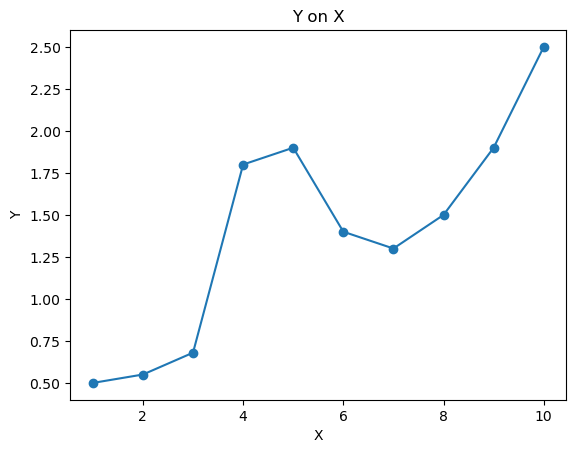

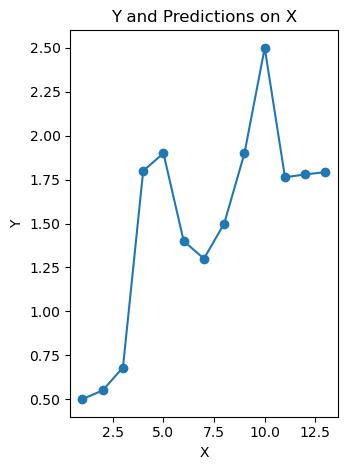

In [10]:
# Assuming X and Y are defined and are 1-D tensors
plt.plot(X.numpy().flatten(), Y.numpy().flatten(), 'o-')
plt.title('Y on X')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# Plot Y and predictions on X
X_combined = torch.cat((X, X_test)).numpy().flatten()
Y_combined = torch.cat((Y, Y_pred.detach())).numpy().flatten()

plt.subplot(1, 2, 2)
plt.plot(X_combined, Y_combined, 'o-')
plt.title('Y and Predictions on X')
plt.xlabel('X')
plt.ylabel('Y')

plt.tight_layout()
plt.show()
